<a href="https://colab.research.google.com/github/alejandrometrio/Crime-Solved-Prediction-DataScience/blob/main/Crime_Solved%3F_Homicide_Reports%2C_1980_2014_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Crime Solved? - Homicide Reports, 1980-2014 USA.ipynb** - Alejandro Rodríguez M

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


# **Homicide Reports, 1976-2014 USA**

The Murder Accountability Project is the most complete database of homicides in the United States currently available. This dataset includes murders from the FBI's Supplementary Homicide Report from 1976 to the present and Freedom of Information Act data on more than 22,000 homicides that were not reported to the Justice Department. This dataset includes the age, race, sex, ethnicity of victims and perpetrators, in addition to the relationship between the victim and perpetrator and weapon used.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np

dataset = '/content/drive/MyDrive/Data Science/Proyect/Proyect2/database.csv'
df = pd.read_csv(dataset)
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

Source: https://www.kaggle.com/datasets/murderaccountability/homicide-reports/code

# **Cleaning of Data**

Getting rid of the data that might not be that useful

In [3]:
df = df.drop(columns=['Record ID','Agency Code','Agency Name','Agency Type','Record Source','City','Month','State','Victim Ethnicity','Perpetrator Ethnicity'])
df.head()

,Year,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Relationship,Weapon,Victim Count,Perpetrator Count
0,1980,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Male,15,Native American/Alaska Native,Acquaintance,Blunt Object,0,0
1,1980,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
2,1980,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,0
3,1980,1,Murder or Manslaughter,Yes,Male,43,White,Male,42,White,Acquaintance,Strangulation,0,0
4,1980,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,0,Unknown,Unknown,Unknown,0,1


In [4]:
df['Year'] = df['Year'].astype(float)
df['Incident'] = df['Incident'].astype(float)
df['Victim Age'] = df['Victim Age'].astype(float)
df['Victim Count'] = df['Victim Count'].astype(float)
df['Perpetrator Age'] = df['Perpetrator Age'].replace(' ',1)
df['Perpetrator Age'] = df['Perpetrator Age'].astype(float)
df['Perpetrator Count'] = df['Perpetrator Count'].astype(float)

In [5]:
df['Victim Age'].unique()
df['Victim Age'] = df['Victim Age'].replace(998, 98)
df['Victim Age'].unique()

array([14., 43., 30., 42., 99., 32., 38., 36., 20., 48., 31., 16., 33.,
       27., 21., 60., 40., 18.,  8., 25., 24., 46., 23., 22., 45., 26.,
       58., 17., 29., 41., 68., 13., 35., 44., 54., 37., 51., 90., 50.,
       52., 61., 63., 19., 28., 70., 72., 74., 53., 57., 76., 79., 69.,
       34., 66., 55., 67., 65., 47.,  1., 49., 62., 75., 56., 59., 78.,
       39., 15.,  0., 71., 77.,  2.,  4., 64., 82., 85.,  6.,  5.,  7.,
        9., 84., 10., 86., 11., 73., 83., 98., 81., 87., 80.,  3., 12.,
       94., 93., 92., 89., 97., 88., 91., 95., 96.])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               638454 non-null  float64
 1   Incident           638454 non-null  float64
 2   Crime Type         638454 non-null  object 
 3   Crime Solved       638454 non-null  object 
 4   Victim Sex         638454 non-null  object 
 5   Victim Age         638454 non-null  float64
 6   Victim Race        638454 non-null  object 
 7   Perpetrator Sex    638454 non-null  object 
 8   Perpetrator Age    638454 non-null  float64
 9   Perpetrator Race   638454 non-null  object 
 10  Relationship       638454 non-null  object 
 11  Weapon             638454 non-null  object 
 12  Victim Count       638454 non-null  float64
 13  Perpetrator Count  638454 non-null  float64
dtypes: float64(6), object(8)
memory usage: 68.2+ MB


This dataset consists of data starting from 1994 to 2014 (20 years), it only involves crimes fully solved and has all of the homicides in which the muerder weapon was able to identify.

# **Visualizations**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

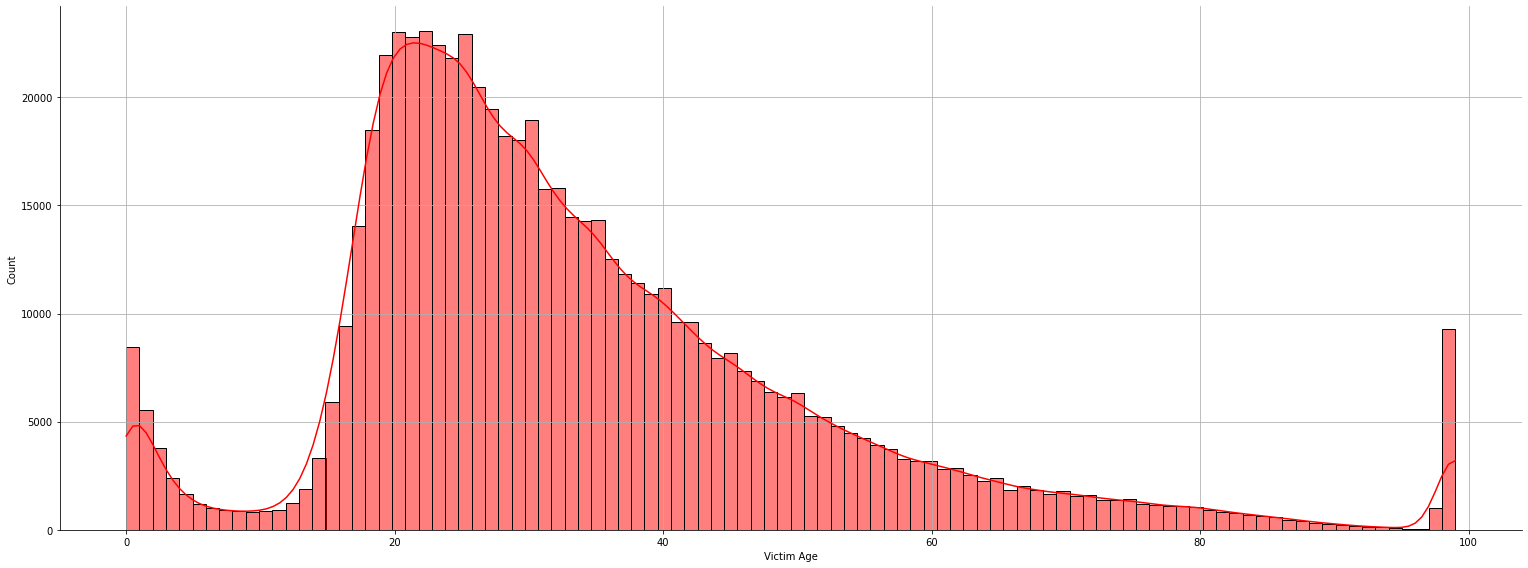

In [8]:
sns.displot(df, x='Victim Age', height=8, aspect=24/9, color='Red', bins = 100, kde='True')
plt.grid(True)

This shows the age distribution of the people that was murder, we can see that most of the murders occurs to people between theirs 20's

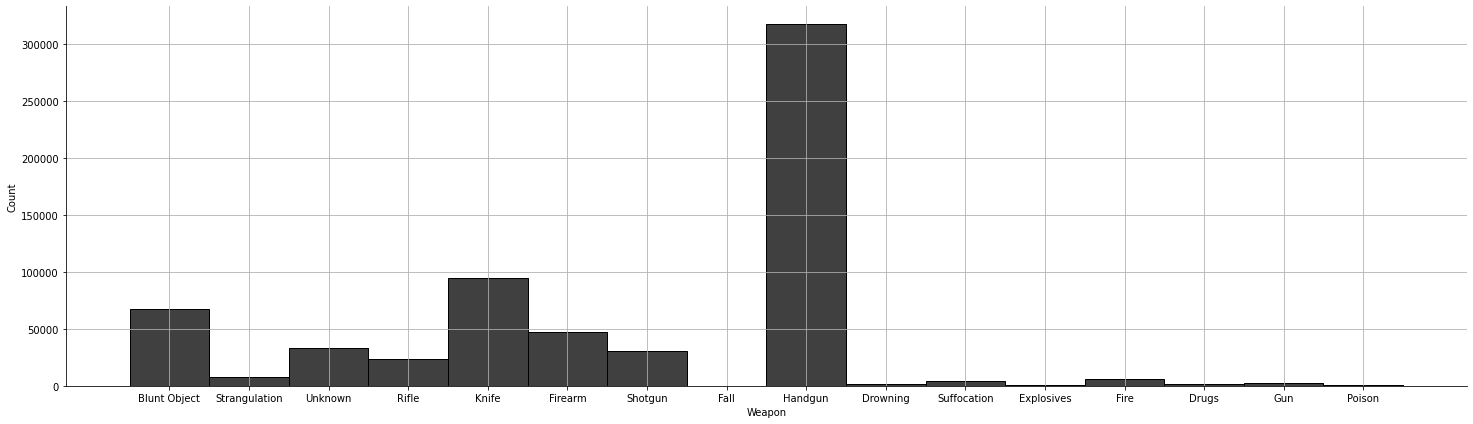

In [9]:
sns.displot(df, x='Weapon', height=6, aspect=24/7, color='Black', bins = 100)
plt.grid(True)

Most of the murders have been done by handgun and knifes and blunt objects

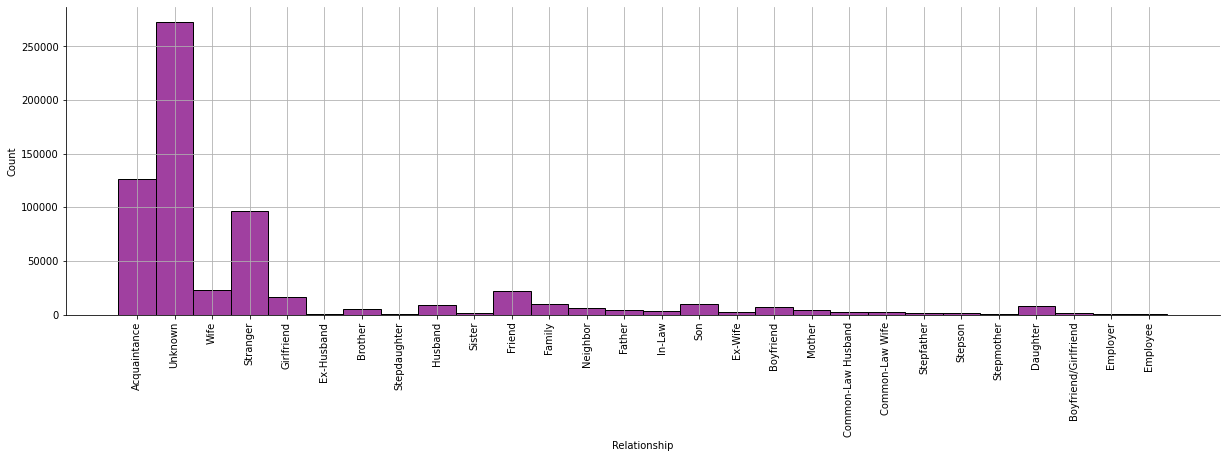

In [10]:
sns.displot(df, x='Relationship', aspect=24/7, color='purple', bins = 100)
plt.grid(True)
plt.xticks(rotation = 90);

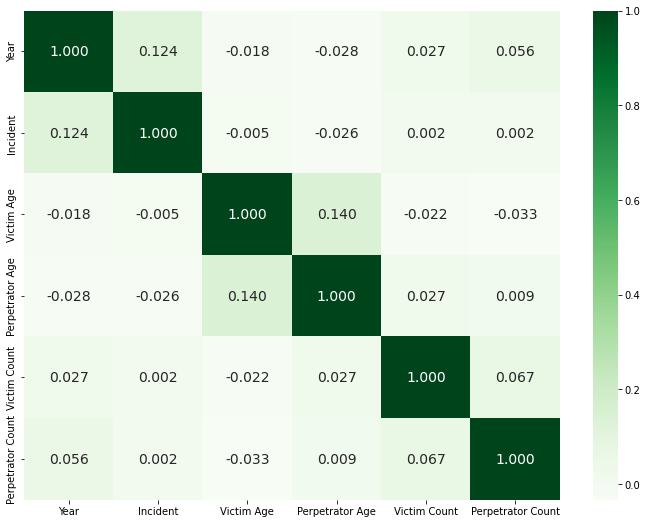

In [11]:
corr = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot = True,cmap = 'Greens' , annot_kws={'size': 14}, fmt='.3f')

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 10 Text major ticklabel objects>)

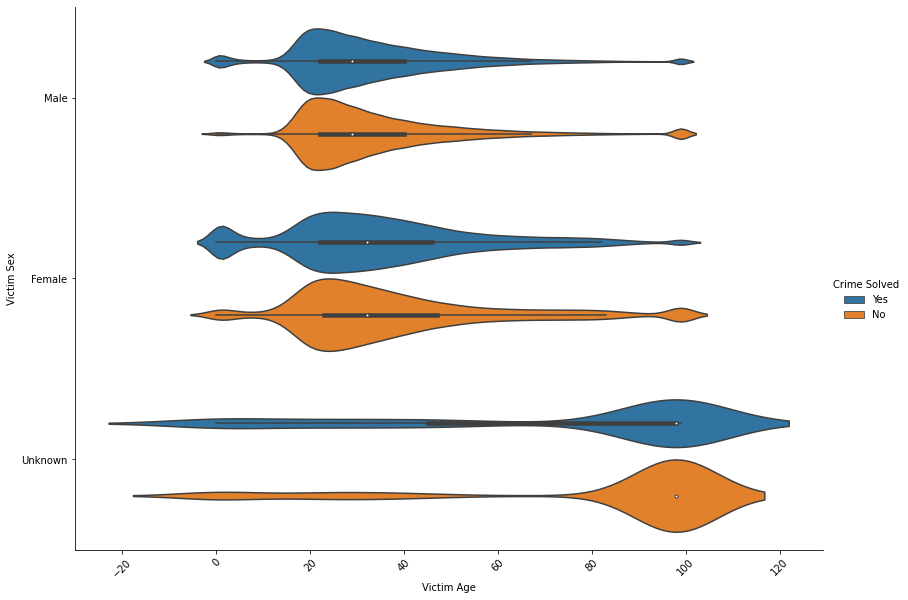

In [12]:
sns.catplot(data=df,kind="violin", x="Victim Age", y="Victim Sex", hue="Crime Solved", height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

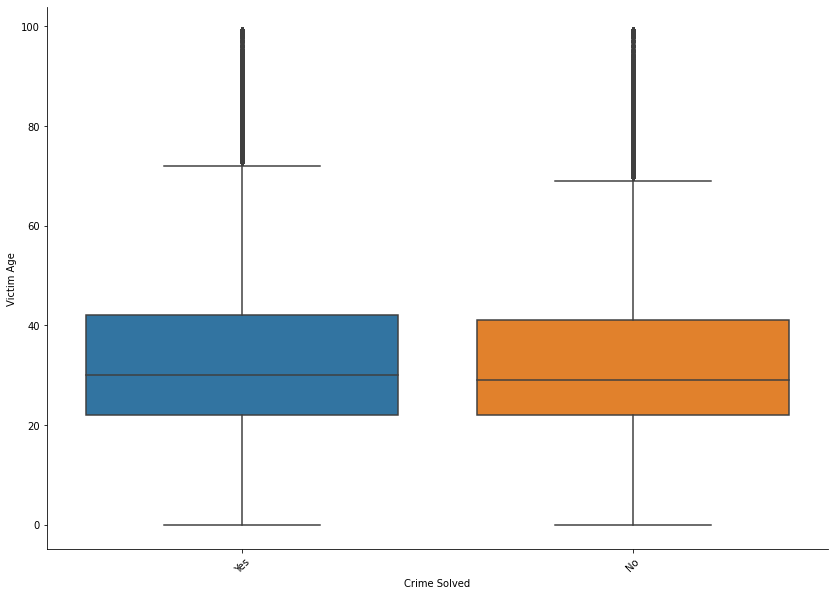

In [13]:
sns.catplot(data=df, kind="box", x="Crime Solved", y="Victim Age", height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=45)

In [14]:
#sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
#g = sns.jointplot(
#    data=df,
#    x="Perpetrator Age", y="Victim Age", hue="Weapon",
#    kind="kde",
#)

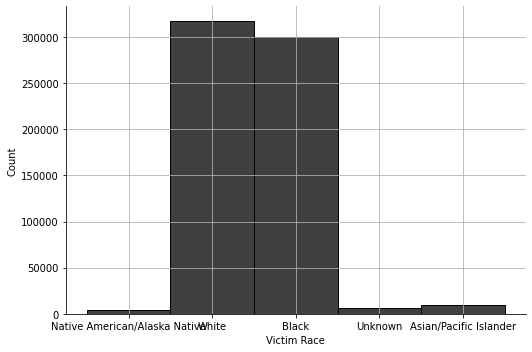

In [15]:
sns.displot(df, x='Victim Race', height=5, aspect=3/2, color='Black', bins = 10)
plt.grid(True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

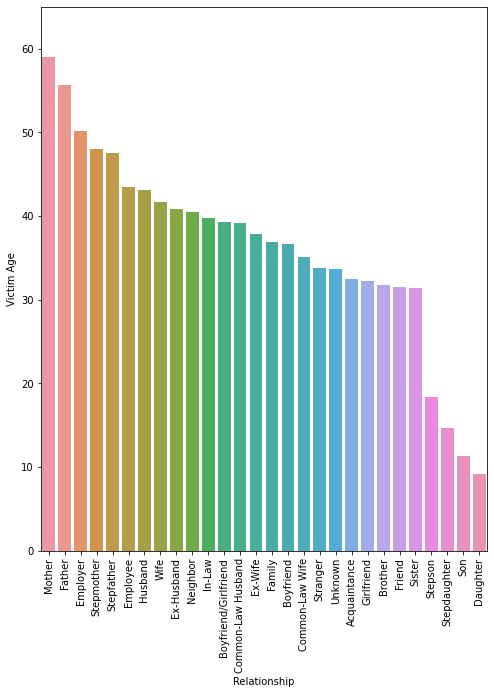

In [16]:
filter = df.groupby('Relationship')['Victim Age'].mean().sort_values(ascending = False)
filter = filter.reset_index()

var = 'Relationship'
data = pd.concat([filter['Victim Age'], filter[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 10))
fig = sns.barplot(x=var, y="Victim Age", data=data)
fig.axis(ymin=0, ymax= 65);
plt.xticks(rotation=90)

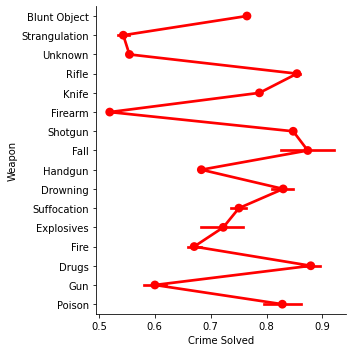

In [32]:
sns.catplot(data=df, x="Crime Solved", y="Weapon", kind="point",color='Red')

# **Processing**

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import train_test_split

In [19]:
df['Crime Solved'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Crime Solved'] = df['Crime Solved'].replace({'Yes': 1, 'No': 0})

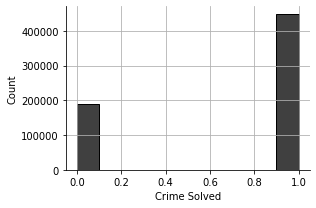

In [21]:
sns.displot(df, x='Crime Solved', height=3, aspect=3/2, color='Black', bins = 10)
plt.grid(True)

In [22]:
y = df['Crime Solved']
X =df.drop(columns = 'Crime Solved')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [23]:
ordinal_encoder = OrdinalEncoder()
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
scaler = StandardScaler()

In [24]:
num_pipe= make_pipeline(scaler)
ord_cat_pipe= make_pipeline(ordinal_encoder)
nom_cat_pipe = make_pipeline(ohe)

In [25]:
num_tuple = (num_pipe, ['Year','Incident','Victim Age','Perpetrator Age','Victim Count','Perpetrator Count'])
#ord_tuple = (ord_cat_pipe ,[])
nom_tuple = (nom_cat_pipe, ['Crime Type','Victim Sex','Victim Race','Perpetrator Sex','Perpetrator Race','Relationship','Weapon'])

In [26]:
preprocessor = make_column_transformer(nom_tuple,num_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Crime Type', 'Victim Sex', 'Victim Race',
                                  'Perpetrator Sex', 'Perpetrator Race',
                                  'Relationship', 'Weapon']),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Year', 'Incident', 'Victim Age',
                                  'Perpetrator Age', 'Victim Count',
                                  'Perpetrator Count'])])

In [27]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Crime Type', 'Victim Sex', 'Victim Race',
                                  'Perpetrator Sex', 'Perpetrator Race',
                                  'Relationship', 'Weapon']),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Year', 'Incident', 'Victim Age',
                                  'Perpetrator Age', 'Victim Count',
                                  'Perpetrator Count'])])

In [28]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [29]:
X_train_processed

array([[ 0.        ,  1.        ,  1.        , ...,  0.87751717,
        -0.22967678, -0.31700578],
       [ 0.        ,  1.        ,  1.        , ...,  0.87751717,
        -0.22967678, -0.31700578],
       [ 0.        ,  1.        ,  0.        , ...,  0.03865353,
        -0.22967678, -0.31700578],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.8282293 ,
        -0.22967678, -0.31700578],
       [ 0.        ,  1.        ,  1.        , ..., -1.13575558,
        -0.22967678, -0.31700578],
       [ 0.        ,  1.        ,  0.        , ...,  1.15713839,
        -0.22967678, -0.31700578]])

In [30]:
df_encoded = pd.DataFrame(preprocessor.fit_transform(df))
df_encoded

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.591620,-0.238394,-1.094927,-0.297575,-0.229359,-0.316354
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-1.591620,-0.238394,0.520132,1.211916,-0.229359,-0.316354
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.591620,-0.227542,-0.203860,-1.136180,-0.229359,-0.316354
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,-1.591620,-0.238394,0.520132,1.211916,-0.229359,-0.316354
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.591620,-0.227542,-0.203860,-1.136180,-0.229359,1.391602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.833146,-0.238394,-0.203860,-1.136180,-0.229359,-0.316354
638450,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.833146,-0.238394,1.578275,2.050522,-0.229359,-0.316354
638451,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.833146,-0.238394,-1.874611,0.093775,-0.229359,-0.316354
638452,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.833146,-0.238394,1.188433,0.596938,-0.229359,1.391602


CPU times: user 13.8 s, sys: 340 ms, total: 14.2 s
Wall time: 14 s


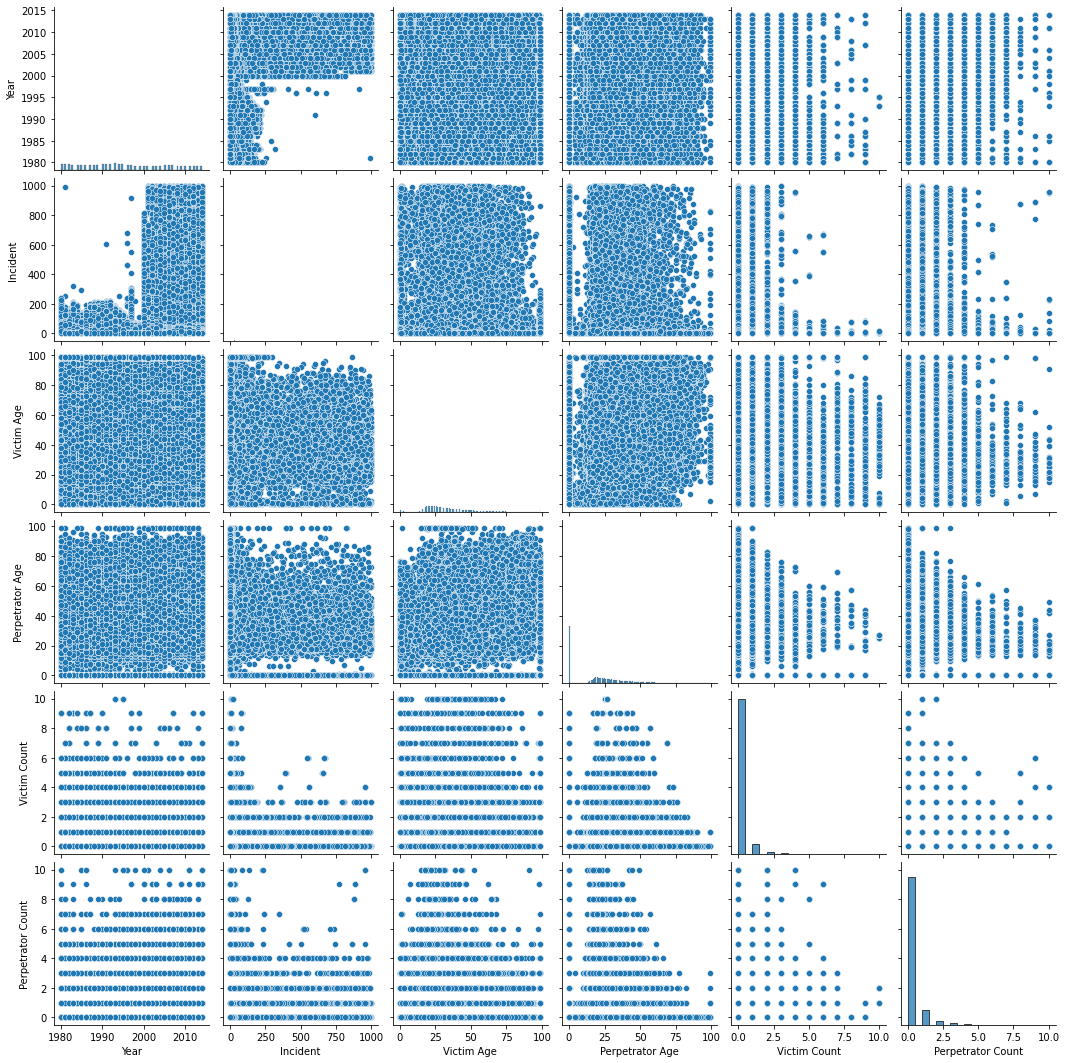

In [31]:
%%time

sns.pairplot(X_train)

# **Modeling**

## **Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [37]:
predictions = dec_tree.predict(X_test_processed)
predictions

array([0., 0., 1., ..., 1., 1., 1.])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[ 47491     43]
 [    45 112035]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47534
           1       1.00      1.00      1.00    112080

    accuracy                           1.00    159614
   macro avg       1.00      1.00      1.00    159614
weighted avg       1.00      1.00      1.00    159614



In [39]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.9999950096360605
0.9973635401048971


In [40]:
dec_tree.get_depth()

18

In [41]:
%%time
max_depth_range = list(range(2, 18))
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

CPU times: user 49.1 s, sys: 80.4 ms, total: 49.2 s
Wall time: 49.1 s


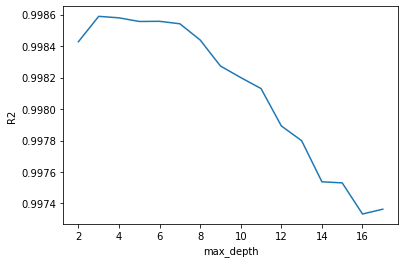

In [42]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [43]:
dec_tree_3 = DecisionTreeRegressor(max_depth = 3, random_state = 42)
dec_tree_3.fit(X_train_processed, y_train)
train_3_score = dec_tree_3.score(X_train_processed, y_train)
test_3_score = dec_tree_3.score(X_test_processed, y_test)
print(train_3_score)
print(test_3_score)

0.998652874402908
0.9985892766884223


## **KNN**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=24)

In [45]:
%%time
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_processed, y_train)
predictions_of_knn = knn.predict(X_test_processed)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy:',knn.score(X_test_processed, y_test))

[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0,

In [46]:
%%time
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions_of_knn))

print(classification_report(y_test, predictions_of_knn))

[[ 47494     40]
 [   133 111947]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47534
           1       1.00      1.00      1.00    112080

    accuracy                           1.00    159614
   macro avg       1.00      1.00      1.00    159614
weighted avg       1.00      1.00      1.00    159614

CPU times: user 317 ms, sys: 4.95 ms, total: 322 ms
Wall time: 322 ms


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 26min 46s, sys: 1min 20s, total: 28min 7s
Wall time: 20min 52s


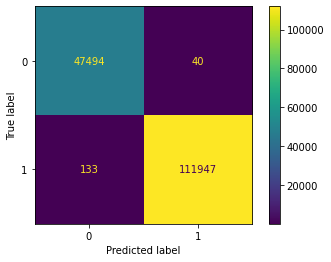

In [47]:
%%time
from sklearn import metrics

metrics.plot_confusion_matrix(knn, X_test_processed, y_test.values)

## **Logistic Multiclass**

In [48]:
%%time
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear',
                            multi_class='ovr')
log_reg.fit(X_train_processed, y_train)
predictions_logistic = log_reg.predict(X_test_processed)

print('Accuracy test: ', log_reg.score(X_test_processed,y_test))
print('Predicciones:',predictions_logistic)

Accuracy test:  0.9996616838121969
Predicciones: [0 0 1 ... 1 1 1]
CPU times: user 4.13 s, sys: 71.8 ms, total: 4.21 s
Wall time: 4.15 s


In [49]:
%%time
print(confusion_matrix(y_test, predictions_logistic))

print(classification_report(y_test, predictions_logistic))

[[ 47512     22]
 [    32 112048]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47534
           1       1.00      1.00      1.00    112080

    accuracy                           1.00    159614
   macro avg       1.00      1.00      1.00    159614
weighted avg       1.00      1.00      1.00    159614

CPU times: user 351 ms, sys: 70.9 ms, total: 422 ms
Wall time: 355 ms


## **Logistic Regression**

In [50]:
%%time
from sklearn.linear_model import LinearRegression

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 13.4 µs


In [51]:
%%time
logreg = LogisticRegression(C = 1000)
scaler = StandardScaler()
logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train_processed,y_train)

predictions_lr = logreg_pipe.predict(X_test_processed)

logreg_pipe.fit(X_train_processed, y_train)
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9996700359201404
0.999649153583019
CPU times: user 40.1 s, sys: 10.8 s, total: 50.9 s
Wall time: 26.8 s


In [52]:
print(confusion_matrix(y_test, predictions_lr))

print(classification_report(y_test, predictions_lr))

[[ 47510     24]
 [    32 112048]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47534
           1       1.00      1.00      1.00    112080

    accuracy                           1.00    159614
   macro avg       1.00      1.00      1.00    159614
weighted avg       1.00      1.00      1.00    159614



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


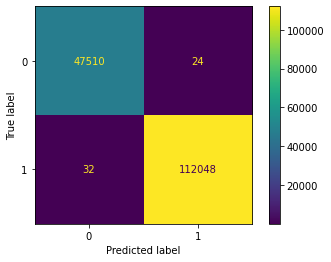

In [53]:
metrics.plot_confusion_matrix(logreg_pipe, X_test_processed, y_test.values)

## **Boosting**

In [54]:
%%time
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_processed, y_train)
print('Train score:', xgb.score(X_train_processed, y_train))
print('Test score:', xgb.score(X_test_processed, y_test))

Train score: 0.9996700359201404
Test score: 0.9996679489267859
CPU times: user 1min 26s, sys: 129 ms, total: 1min 26s
Wall time: 1min 26s


In [55]:
%%time
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train_processed, y_train)
print('Train score:', lgbm.score(X_train_processed, y_train))
print('Test score:', lgbm.score(X_test_processed, y_test))

Train score: 0.9995885890903016
Test score: 0.9993484280827496
CPU times: user 7.59 s, sys: 43 ms, total: 7.63 s
Wall time: 7.66 s


In [56]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_processed, y_train)
print('Train score:', gb.score(X_train_processed, y_train))
print('Test score:', gb.score(X_test_processed, y_test))

Train score: 0.9996909197226631
Test score: 0.9996428884684301
CPU times: user 4min 40s, sys: 481 ms, total: 4min 40s
Wall time: 4min 39s


In [57]:
score = gb.predict(X_test_processed)

In [58]:
print(confusion_matrix(y_test, score))

print(classification_report(y_test, score))

[[ 47509     25]
 [    32 112048]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47534
           1       1.00      1.00      1.00    112080

    accuracy                           1.00    159614
   macro avg       1.00      1.00      1.00    159614
weighted avg       1.00      1.00      1.00    159614



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


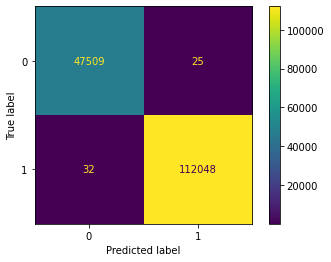

In [59]:
metrics.plot_confusion_matrix(gb, X_test_processed, y_test.values)